# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Chris Andrew\
_Student No._: 2019-02636\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 05, 2024 11:59 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Chris Andrew Mendoza

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 1080652.jpg
'132 PROB SETS'
'151 Problem Set 1.pdf'
'165 Camera Setup'
'167 Activity 6: Color Science '
'170 Problem Set 1.pdf'
 184
 184_act_1
 191_Data
'191 Set A'
'191 - SET C EXPERIMENTS'
'192 Exp 2'
'192 Experiment 3'
'192 Experiment 3 (New Data)'
 192_SetB_Exp3.xlsx
'192 Set B - Experiment 3.gsheet'
 192_SetC_Experiment_1.gsheet
 20230607_173628.jpg
 20230910_110441.jpg
 20230910_124050_C.jpg
 20230917_150350.jpg
 20230917_150406.jpg
 20230917_150420.jpg
 20231004_152819.jpg
 20231004_155323.jpg
'20231006_154902 (1).mp4'
 20231006_154902.mp4
 20231006_155031.jpg
 20231025_144210.jpg
 20231107_131656.jpg
 20231107_133314.jpg
 20231107_140653.jpg
 20231108_092442.mp4
 20231108_092720.jpg
 20231108_163418.mp4
 20231108_163745.jpg
 20231127_191235.jpg
 20231129_151947.jpg
 20231206_021930.jpg
 20231206_122318.jpg
 20231206_124014.jpg
 20231212_143038.jpg
 20231212_151520.jpg
 20231212_151537.jpg
'20231215_142741 (1).jpg'
'20231215_142741 (2).jpg'
'20231215_142741 (3).jpg'
'20231215_

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [5]:
file_path = "/content/drive/My Drive/App Physics 157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [6]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [7]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [8]:
def get_features_targets(data):
    """
    Extracts input features and targets from the galaxy_catalogue.npy dataset.

    Parameters:
    - data: numpy array, the galaxy catalog dataset.

    Returns:
    - features: numpy array, input features including colors, magnitudes, eccentricity, and concentrations.
    - targets: numpy array, corresponding classes.
    """
    # Extracting relevant columns from the dataset
    colors = data['u-g'], data['g-r'], data['r-i'], data['i-z']
    magnitudes = data['m4_u'], data['m4_g'], data['m4_r'], data['m4_i'], data['m4_z']
    eccentricity = data['ecc']
    concentrations = data['petroR50_u']/data['petroR90_u'], data['petroR50_r']/data['petroR90_r'], data['petroR50_z']/data['petroR50_z']
    classes = data['class']

    # Combining extracted features into a single array
    features = np.column_stack((colors[0], colors[1], colors[2], colors[3],
                                eccentricity, magnitudes[0], magnitudes[1],
                                magnitudes[2], magnitudes[3], magnitudes[4],
                                concentrations[0], concentrations[1], concentrations[2]))

    return features, classes

# Get features and targets
features, targets = get_features_targets(data)

print("Features shape:", features.shape)
print("Targets shape:", targets.shape)


Features shape: (780, 13)
Targets shape: (780,)


# **Discussion**

Here, we grouped the data in such a way that all features for 1 galaxy (of a particular class) is grouped together in 1 row. All in all, we have a data set composed of 780 rows and 13 columns with each row representing all relevant information about a single galaxy. Why did we do this? Because we want our model to learn the patterns behind this information to determine what type of galaxy would have a particular set of information. To put it simply, we want our model to learn how to match the info contained in each row to the corresponding class (the target) for that galaxy.

#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def predict_class(data):
    """
    Train and validate a model that predicts a galaxy's class from its photometric properties.

    Parameters:
    - data: numpy array, the galaxy catalog dataset.

    Returns:
    - predicted_class: numpy array, predicted classes for the test galaxies.
    - actual_class: numpy array, actual classes for the test galaxies.
    """
    # Get features and targets
    features, classes = get_features_targets(data)

    # Split the dataset into training and test sets (80:20 split)
    features_train, features_test, classes_train, classes_test = train_test_split(features, classes, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Classifier
    model = DecisionTreeClassifier(random_state=42)
    model.fit(features_train, classes_train)

    # Make predictions on the test set
    predicted_class = model.predict(features_test)

    return predicted_class, classes_test

predicted_class, actual_class = predict_class(data)

print("predited_class shape:", predicted_class.shape)

for i in range(156):
    print(f"{i}, Predicted: {predicted_class[i]}, Actual: {actual_class[i]}")


predited_class shape: (156,)
0, Predicted: spiral, Actual: spiral
1, Predicted: spiral, Actual: spiral
2, Predicted: merger, Actual: spiral
3, Predicted: spiral, Actual: spiral
4, Predicted: elliptical, Actual: elliptical
5, Predicted: spiral, Actual: merger
6, Predicted: merger, Actual: elliptical
7, Predicted: spiral, Actual: spiral
8, Predicted: merger, Actual: merger
9, Predicted: spiral, Actual: spiral
10, Predicted: elliptical, Actual: elliptical
11, Predicted: elliptical, Actual: spiral
12, Predicted: merger, Actual: spiral
13, Predicted: spiral, Actual: spiral
14, Predicted: spiral, Actual: spiral
15, Predicted: merger, Actual: merger
16, Predicted: elliptical, Actual: elliptical
17, Predicted: merger, Actual: merger
18, Predicted: elliptical, Actual: elliptical
19, Predicted: merger, Actual: merger
20, Predicted: merger, Actual: merger
21, Predicted: spiral, Actual: merger
22, Predicted: merger, Actual: merger
23, Predicted: elliptical, Actual: elliptical
24, Predicted: merger

# **Discussion**

As we can see from the results, our model is able to get the correct classification most of the time but it's accuracy is not 100%. In order to get a better measure of its performance, we need to get its test accuracy (# of correct predictions VS total # of predictions)

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

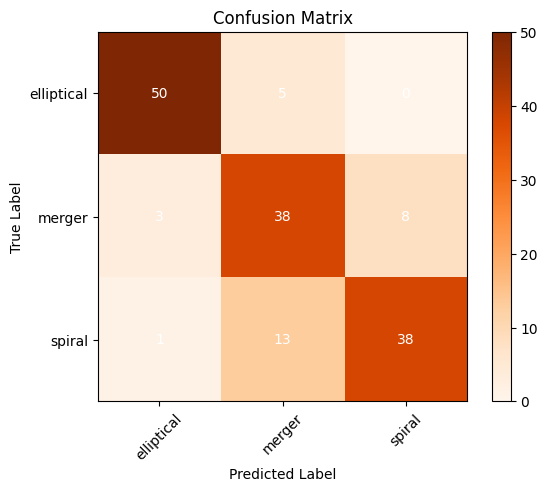

Test Accuracy: 80.77%


In [21]:
predicted_class, actual_class = predict_class(data)

# Get confusion matrix
conf_matrix = confusion_matrix(actual_class, predicted_class)

# Plot confusion matrix with labels and tick marks
classes = np.unique(actual_class)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Get test accuracy
accuracy = accuracy_score(actual_class, predicted_class)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# **Discussion**

Here, we can see that the diagonal is bright because the predicted label matches the true label. The number displayed on the diagonal squares represent the number of correct matches. However, we can also observe that mislabeling still occurs as for example, some merger galaxies get mistakenly classified as spiral galaxies. For our current model, it is shown that it performs very well on classiffying elliptical galaxies as it correctly classified 50 galaxies as elliptical out of the 55 total elliptical galaxies. However, it is also shown that it does not perform as good as when classifying spiral galaxies as it only correctly classified 38 spiral galaxies out of the 52 total spiral galaxies. The classification of merger galaxies is slightly better than that of spiral galaxies but it is still not as good as the model's performance in classifying elliptical galaxy. With that said, the test accuracy of 80.77% seems to be accurate.
